# 종류

1. GaussianNB : 특성이 연속적인 값을 가질 때 -> 평균, 분산을 계산하여 가우시안 분포로 가정함
2. BernoulliNB : 특성이 이진 데이터일 때
3. MultinomialNB : 특성이 카운트 데이터일 때

# 원리

 * 데이터의 특성이 순서가 상관없고 독립적이라고 가정
 * 데이터를 바탕으로 확률적 계산으로 분류 : class = argmax(p(class)\*Πp(x|class))
 * logistic regression 과 비슷하게 coef_와 intercept_를 반환하지만 기울기와 절편을 뜻하지는 않음
     * _coef : 카운트수나 분포확률을 로그 취한 값_
     * _intercept : 클래스 빈도 수를 로그 취한 값_
 * 확률의 곱을 로그로 변환해 합연산으로 바꾸므로 선형모델과 예측 공식은 형태가 같음
 * Gaussian 의 경우 var_smoothing, Bernoulli와 Multinomial의 경우 alpha로 확률을 비슷하게 만들어서 복잡도 제어

# 코드

In [5]:
from ml1.preamble import*

from sklearn.datasets import make_circles
X,y =  make_circles(n_samples=400, factor=.3, noise=.05)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0, stratify= y)

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB(var_smoothing=0.1).fit(X_train, y_train)
print(f"훈련 데이터 정확도 : {clf.score(X_train,y_train):.2f}")
print(f"테스트 데이터 정확도 : {clf.score(X_test,y_test):.2f}")
# mglearn.discrete_scatter(X[:,0],X[:,1],y)

훈련 데이터 정확도 : 1.00
테스트 데이터 정확도 : 1.00


* 결정 경계

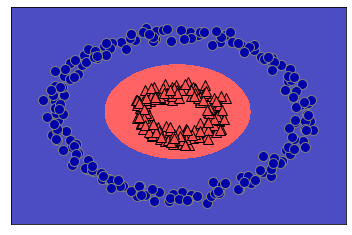

In [6]:
mglearn.plots.plot_2d_classification(clf,X, fill=True, alpha=.7, cm=mglearn.cm2)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

* var_smoothing에 따른 경계 변화

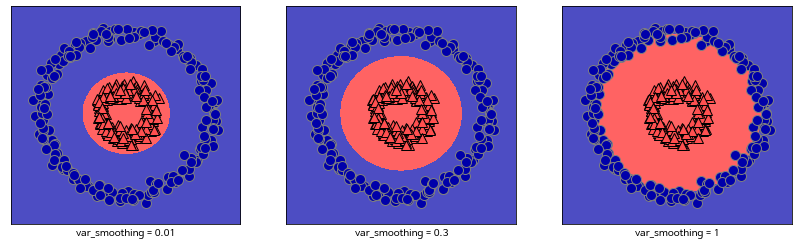

In [12]:
fig, axes = plt.subplots(1,3, figsize=(14,4))
for var_smoothing, ax in zip([0.01,0.3,1], axes):
    clf = GaussianNB(var_smoothing=var_smoothing).fit(X, y)
    mglearn.plots.plot_2d_classification(clf,X, fill=True, alpha=.7, cm=mglearn.cm2, ax=ax)
    mglearn.discrete_scatter(X[:,0],X[:,1],y, ax=ax)
    ax.set_xlabel(f'var_smoothing = {var_smoothing}')

# 장단점

## 장점

* 빠름 (선형모델보다도 더 빠름)
* 회소한 고차원 데이터에서 잘 작동함
* 이산적 데이터에 적용 가능

## 단점

* 매개변수가 성능을 크게 개선시키지는 않음
* 특성이 독립적인것을 가정함